# Projekt Python

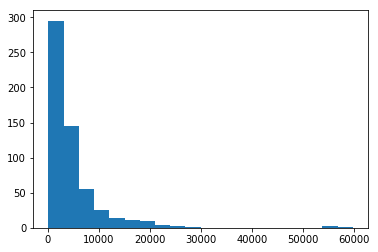

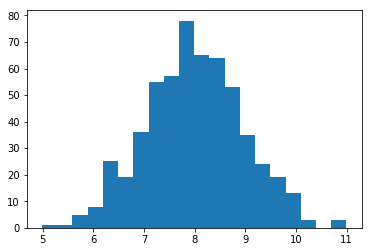

Test KS KstestResult(statistic=0.016488541498851428, pvalue=0.9979486194590917)
(-2510.0722885635805, 446)
(-1497.7837413391771, 419)
(-12801.869048970373, 423)


In [5]:

l_szkod = {            # liczba szkod : liczba polis
  0 : 3437,
  1 : 522,
  2 : 40,
  3 : 2,
  4 : 0,
  5 : 0
}

import csv
import urllib.request as ul
import codecs
import matplotlib.pyplot as plt
import scipy as sc
from scipy.stats.stats import kstest

srednia_l_szkod = sum( [x*y for x,y in l_szkod.items()] )/sum(l_szkod.values())

szkody = []
response = ul.urlopen('http://szufel.pl/pliki/szkody.txt')
data = csv.reader (codecs.iterdecode(response, 'utf-8') ,delimiter=";")
for row in data:
        szkody.append(int(row[1]))
plt.hist(szkody,bins=20)
plt.show() 

szkody_ln = sc.log(szkody)
plt.hist(szkody_ln,bins=20)
plt.show()        
print("Test KS",kstest(szkody_ln, sc.stats.norm.cdf, args=(sc.mean(szkody_ln),sc.std(szkody_ln))))
#H0 â€“ rozkĹ‚ad normalny â€“ p-value=0.99 brak podstaw do odrzucenia H0
#cdf - cumulative density function - dystrybuanta

sr_szkoda_ln = sc.mean(szkody_ln)
std_szkoda_ln = sc.std(szkody_ln)

l_lat_bezszk_taryfa = {            # lat bezszk : taryfa
  0 : 1,
  1 : 0.9,
  2 : 0.8,
  3 : 0.7,
  4 : 0.6,
  5 : 0.5,
  6 : 0.4,
  7 : 0.3
}

import numpy.random as rd
import numpy as np

def symuluj_ubezpieczenia(l_klientow,nadwyzka,skladka,srednia_l_szkod,sr_szkoda_ln,std_szkoda_ln):
    daty_umow = rd.randint(0,365, l_klientow)
    kal_l_wplat = np.zeros(365+365+30, dtype="int")
    for dataUmowy in daty_umow:
        kal_l_wplat[dataUmowy] += 1  
    l_szkod_k = rd.poisson(srednia_l_szkod,l_klientow)    
    kal_l_wyplat = np.zeros(365+365+30, dtype="int") #365 to zapas
    for k in range(l_klientow):
        for s in range(l_szkod_k[k]):
            #dla kazdej szkody ustal date wyplaty
            data_wyp = daty_umow[k]+rd.randint(0,365)+rd.randint(15,30)
            kal_l_wyplat[data_wyp] += 1            
    for dzien in range(len(kal_l_wyplat)):
        nadwyzka += kal_l_wplat[dzien]*skladka*l_lat_bezszk_taryfa[rd.randint(0,8)]
        l_wyplat = kal_l_wyplat[dzien]
        odszkodowania = 0 
        if l_wyplat>0:
            odszkodowania=np.sum(rd.lognormal(sr_szkoda_ln,std_szkoda_ln,l_wyplat))
        if (nadwyzka < odszkodowania):
           return (nadwyzka-odszkodowania, dzien)
        nadwyzka -= odszkodowania
    return (nadwyzka, dzien)


sr_szkoda_ln    = 7.9953648143576634
std_szkoda_ln   = 0.9644771368064744
srednia_l_szkod = 0.1519620094976256

print(symuluj_ubezpieczenia(10000,10000,700,srednia_l_szkod,sr_szkoda_ln,std_szkoda_ln))
print(symuluj_ubezpieczenia(10000,10000,700,srednia_l_szkod,sr_szkoda_ln,std_szkoda_ln))
print(symuluj_ubezpieczenia(10000,10000,700,srednia_l_szkod,sr_szkoda_ln,std_szkoda_ln))


